In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

### Import Data for both Models

In [2]:
## Import Boston and standardize
np.random.seed(123)
boston = datasets.load_boston()
X_boston = boston['data']
X_boston = (X_boston - X_boston.mean(0))/(X_boston.std(0))
y_boston = boston['target']

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y_boston)*test_frac)
test_idxs = np.random.choice(np.arange(len(y_boston)), test_size, replace = False)
X_boston_train = np.delete(X_boston, test_idxs, 0)
y_boston_train = np.delete(y_boston, test_idxs, 0)
X_boston_test = X_boston[test_idxs]
y_boston_test = y_boston[test_idxs]

## Import cancer and standardize
np.random.seed(123)
cancer = datasets.load_breast_cancer()
X_cancer = cancer['data']
X_cancer = (X_cancer - X_cancer.mean(0))/(X_cancer.std(0))
y_cancer = 1*(cancer['target'] == 1)

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y_cancer)*test_frac)
test_idxs = np.random.choice(np.arange(len(y_cancer)), test_size, replace = False)
X_cancer_train = np.delete(X_cancer, test_idxs, 0)
y_cancer_train = np.delete(y_cancer, test_idxs, 0)
X_cancer_test = X_cancer[test_idxs]
y_cancer_test = y_cancer[test_idxs]

# FeedForwardNeuralNetwork Regression

In [3]:
# import package
from MyNN import FeedForwardNeuralNetwork

In [4]:
ffnn = FeedForwardNeuralNetwork()
ffnn.fit(X_boston_train, y_boston_train, n_hidden = 8)
y_boston_test_hat = ffnn.predict(X_boston_test)

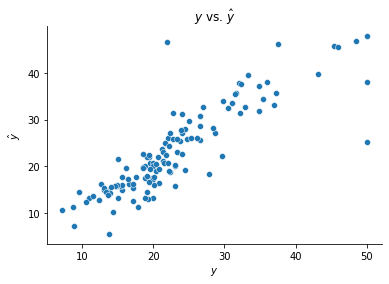

In [5]:
# plot results
fig, ax = plt.subplots()
sns.scatterplot(y_boston_test, y_boston_test_hat[0])
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'$y$ vs. $\hat{y}$')
sns.despine()
plt.show()

# FeedForwardNeuralNetwork Classification

In [6]:
ffnn = FeedForwardNeuralNetwork()
# different attributes for classification
# specifically loss and f2
ffnn.fit(X_cancer_train, y_cancer_train, n_hidden = 8,
         loss = 'log', f2 = 'sigmoid', seed = 123, lr = 1e-4)
y_cancer_test_hat = ffnn.predict(X_cancer_test)
# measure the accuracy
np.mean(y_cancer_test_hat.round() == y_cancer_test)

0.9929577464788732

# Matrix Approach: FeedForwardNeuralNetwork - Regression

In [7]:
from MyNN import FeedForwardMatrix

In [8]:
ffnn = FeedForwardMatrix()
ffnn.fit(X_boston_train, y_boston_train, n_hidden = 8)
y_boston_test_hat = ffnn.predict(X_boston_test)

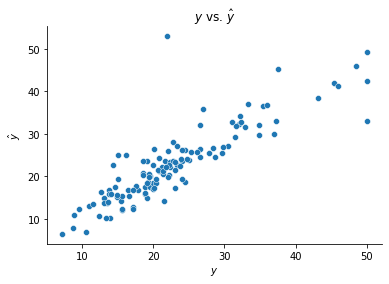

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(y_boston_test, y_boston_test_hat[0])
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'$y$ vs. $\hat{y}$')
sns.despine()
plt.show()

# Matrix Approach: FeedForwardNeuralNetwork - Classification

In [11]:
ffnn = FeedForwardMatrix()
ffnn.fit(X_cancer_train, y_cancer_train, n_hidden = 8,
         loss = 'log', f2 = 'sigmoid', seed = 123, lr = 1e-4)
y_cancer_test_hat = ffnn.predict(X_cancer_test)
# find accuracy of NN
np.mean(y_cancer_test_hat.round() == y_cancer_test)

0.9929577464788732

# Implementation Using Tensorflow

In [1]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
boston = datasets.load_boston()
X_boston = boston['data']
y_boston = boston['target']

We will use the sequential Keras API to build our neural network.

In [4]:
# instatiate the model
model = tf.keras.models.Sequential(name = 'Sequential_model')

# add layers
model.add(tf.keras.layers.Dense(units = 8,
                                activation = 'relu',
                                input_shape = (X_boston.shape[1], ),
                                name = 'hidden'))

model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'linear',
                                name = 'output'))

# compile
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

# fit the model
model.fit(X_boston, y_boston, epochs = 100, batch_size = 1, validation_split = 0.2, verbose = 0)

Model: "Sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 8)                 112       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Create Predictions
yhat_boston = model.predict(X_boston)[:,0]

In [ ]:
# Plot
fig, ax = plt.subplots()
sns.scatterplot(y_boston, yhat_boston)
ax.set(xlabel = r"$y$", ylabel = r"$\hat{y}$", title = r"$y$ vs. $\hat{y}$")
sns.despine()
plt.show()